# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [1948]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

import warnings
warnings.filterwarnings('ignore')

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [1949]:
df = pd.read_csv("data.csv")
df.head(10)

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000
5,14115,1311.325845,Pave,1Fam,5,5,1993,1995,Gable,TA,...,Y,1362,126.533886,2,TA,480,44.593440,10/2009,Normal,143000
6,10084,936.833852,Pave,1Fam,8,5,2004,2005,Gable,Gd,...,Y,1694,157.377682,2,Gd,636,59.086308,8/2007,Normal,307000
7,10382,964.518946,Pave,1Fam,7,6,1973,1973,Gable,TA,...,Y,2090,194.167270,3,TA,484,44.965052,11/2009,Normal,200000
8,6120,568.566360,Pave,1Fam,7,5,1931,1950,Gable,TA,...,Y,1774,164.809922,2,TA,468,43.478604,4/2008,Abnorml,129900
9,7420,689.340260,Pave,2fmCon,5,6,1939,1950,Gable,TA,...,Y,1077,100.056531,1,TA,205,19.045115,1/2008,Normal,118000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [1950]:
df.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


In [1951]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

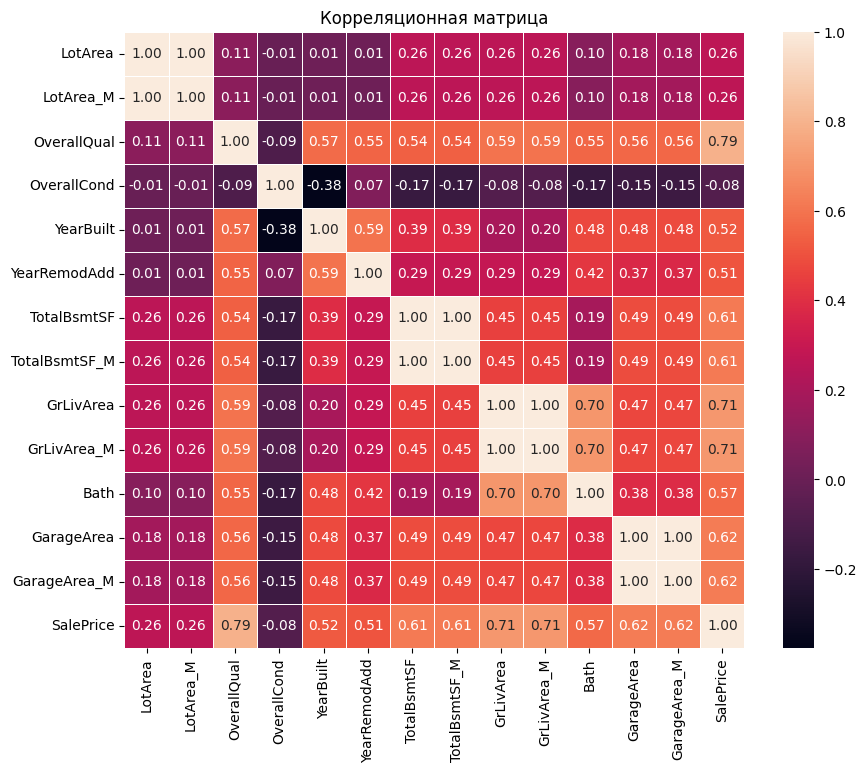

In [1952]:
nonnum = ["Street", "BldgType", "RoofStyle", 
        "ExterQual", "ExterCond", "Foundation", 
        "Heating", "HeatingQC", "CentralAir",
        "KitchenQual", "SaleCondition", "DateSold"]

dfnumeric = df.drop(nonnum, axis=1)

correlation_matrix = dfnumeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [1953]:
dfnumeric.drop(["LotArea_M", "TotalBsmtSF_M", "GrLivArea_M", "GarageArea_M"], axis=1, inplace=True)

dfnumeric

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice
0,8450,7,5,2003,2003,856,1710,3,548,208500
1,9600,6,8,1976,1976,1262,1262,2,460,181500
2,11250,7,5,2001,2002,920,1786,3,608,223500
3,9550,7,5,1915,1970,756,1717,1,642,140000
4,14260,8,5,2000,2000,1145,2198,3,836,250000
...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,953,1647,3,460,175000
1456,13175,6,6,1978,1988,1542,2073,2,500,210000
1457,9042,7,9,1941,2006,1152,2340,2,252,266500
1458,9717,5,6,1950,1996,1078,1078,1,240,142125


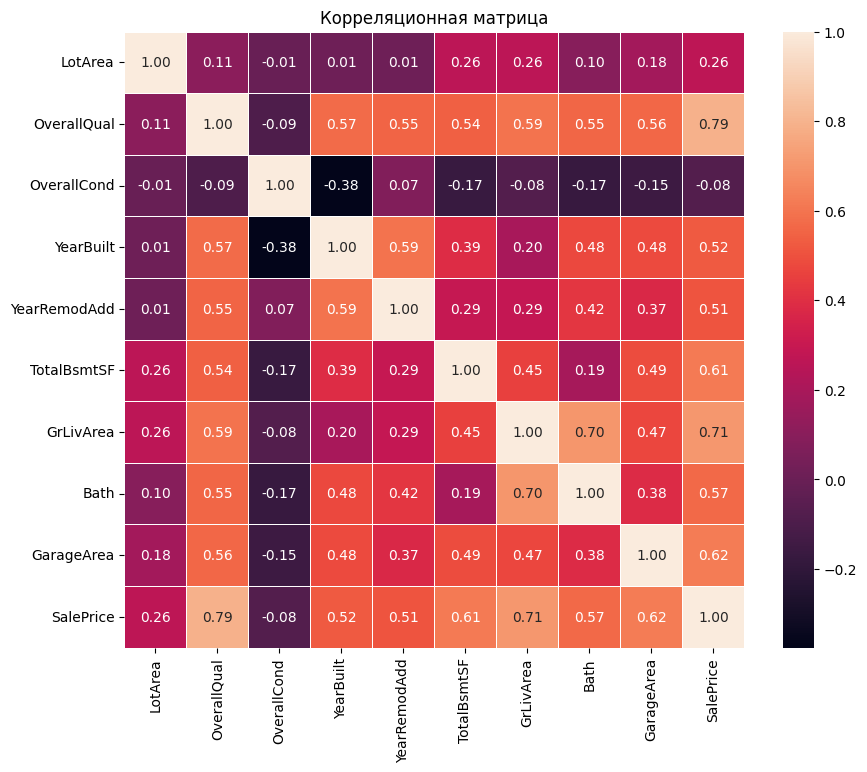

In [1954]:
correlation_matrix = dfnumeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

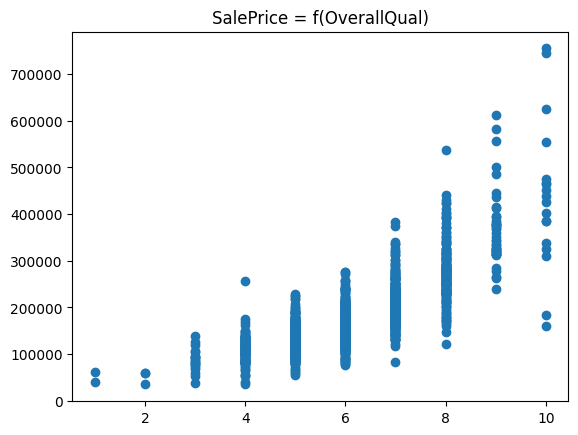

In [1955]:
plt.scatter(y=dfnumeric.SalePrice, x=dfnumeric.OverallQual)
plt.title("SalePrice = f(OverallQual)")
plt.show()

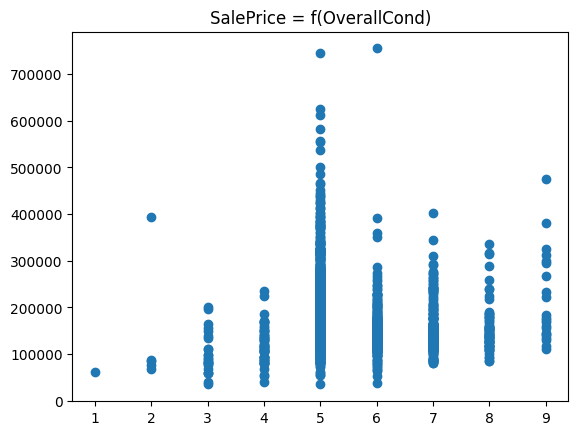

In [1956]:
plt.scatter(y=dfnumeric.SalePrice, x=dfnumeric.OverallCond)
plt.title("SalePrice = f(OverallCond)")
plt.show()

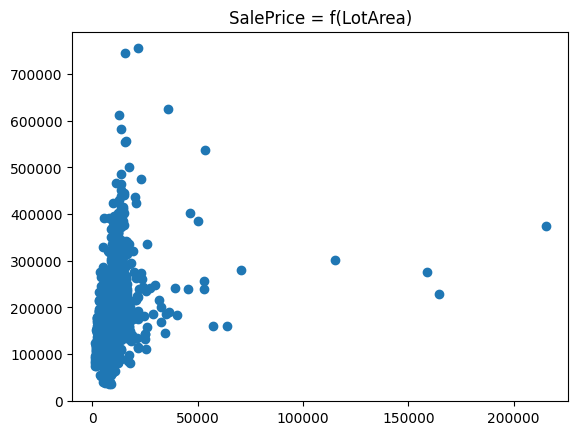

In [1957]:
plt.scatter(y=dfnumeric.SalePrice, x=dfnumeric.LotArea)
plt.title("SalePrice = f(LotArea)")
plt.show()

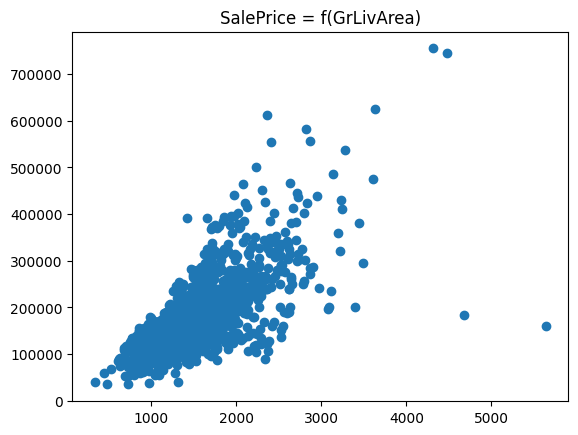

In [1958]:
plt.scatter(y=dfnumeric.SalePrice, x=dfnumeric.GrLivArea)
plt.title("SalePrice = f(GrLivArea)")
plt.show()

4. Сделайте предварительные выводы.

На первом и последнем графиках прослеживается некоторая зависимость между фичей и целевой переменной, согласно корреляционной матрице. Фичи же с минимальным значением корреляции по модулю действительно выглядят как рандомное месиво

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [1959]:
dfnumeric[["HouseRemodAge"]] = 2025 - dfnumeric[["YearRemodAdd"]]
dfnumeric[["HouseAge"]] = 2025 - dfnumeric[["YearBuilt"]]

# Эти две переменные помогут проследить зависимость между ценой и возрастом дома, а также проследить влияние реконструкции на цену

df['DateSold'] = pd.to_datetime(df['DateSold'], format='%m/%Y')
dfnumeric["YearSold"] = df['DateSold'].apply(lambda x: x.year)
dfnumeric["MonthSold"] = df['DateSold'].apply(lambda x: x.month)

# Эти две переменные учитывают сезонные колебания цен на недвижимость

dfnumeric["BsmtPresence"] = df["TotalBsmtSF"].apply(lambda x: int(x > 0))
dfnumeric["GaragePresence"] = df["GarageArea"].apply(lambda x: int(x > 0))

# Наличие гаража и подвала могут также повлиять на формирование цены

dfnumeric

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,HouseRemodAge,HouseAge,YearSold,MonthSold,BsmtPresence,GaragePresence
0,8450,7,5,2003,2003,856,1710,3,548,208500,22,22,2008,2,1,1
1,9600,6,8,1976,1976,1262,1262,2,460,181500,49,49,2007,5,1,1
2,11250,7,5,2001,2002,920,1786,3,608,223500,23,24,2008,9,1,1
3,9550,7,5,1915,1970,756,1717,1,642,140000,55,110,2006,2,1,1
4,14260,8,5,2000,2000,1145,2198,3,836,250000,25,25,2008,12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,953,1647,3,460,175000,25,26,2007,8,1,1
1456,13175,6,6,1978,1988,1542,2073,2,500,210000,37,47,2010,2,1,1
1457,9042,7,9,1941,2006,1152,2340,2,252,266500,19,84,2010,5,1,1
1458,9717,5,6,1950,1996,1078,1078,1,240,142125,29,75,2010,4,1,1


## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [1960]:
dfprep = dfnumeric.copy()

for i in range(len(nonnum)-1):
    dfprep[nonnum[i]] = df[nonnum[i]]

#     unik = df[nonnum[i]].unique()

#     for j in range(len(unik)):
#         dfprep[nonnum[i]].replace(unik[j], j, inplace=True)


train_df, test_df = train_test_split(dfprep, test_size=0.3)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [1961]:
for i in range(len(nonnum)-1):
    unik = train_df[nonnum[i]].unique()

    for j in range(len(unik)):
        train_df[nonnum[i]].replace(unik[j], j, inplace=True)


for i in range(len(nonnum)-1):
    unik = test_df[nonnum[i]].unique()

    for j in range(len(unik)):
        test_df[nonnum[i]].replace(unik[j], j, inplace=True)

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [1962]:
train_df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,...,BldgType,RoofStyle,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,SaleCondition
282,5063,7,5,2007,2008,1314,1314,2,626,207500,...,0,0,0,0,0,0,0,0,0,0
347,17600,6,5,1960,1960,1478,1478,2,498,157500,...,1,0,1,0,1,0,0,0,1,0
1287,36500,5,5,1964,1964,1624,1582,2,390,190000,...,1,0,1,1,1,0,1,0,1,0
454,9297,5,5,1976,1976,1728,1728,2,560,188000,...,2,0,1,0,1,0,2,0,1,1
1301,7500,6,7,1942,1950,771,1494,1,213,177500,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,1920,5,5,1971,1971,765,1365,2,440,122500,...,3,0,1,0,1,0,0,0,1,0
1027,9520,8,5,2007,2008,1638,1646,2,800,293077,...,1,0,0,0,0,0,0,0,0,2
401,8767,7,5,2005,2005,1310,1310,2,400,164990,...,1,0,0,0,0,0,0,0,0,2
237,9453,7,7,1993,2003,996,1744,3,457,194500,...,1,0,0,0,0,0,0,0,0,0


In [1963]:
for col in train_df.columns:
    mn = train_df[col].min()
    mx = train_df[col].max()

    train_df[col] = (train_df[col] - mn) / (mx - mn)


for col in test_df.columns:
    mn = test_df[col].min()
    mx = test_df[col].max()

    test_df[col] = (test_df[col] - mn) / (mx - mn)

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [1964]:
model = LinearRegression()

train_Y = train_df[["SalePrice"]]
train_X = train_df.drop(["SalePrice"], axis=1)

test_Y = test_df[["SalePrice"]]
test_X = test_df.drop(["SalePrice"], axis=1)

model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

mse(test_Y, pred_Y), mae(test_Y, pred_Y), r2(test_Y, pred_Y)

(0.006063770018330354, 0.06238398594075778, 0.6978972754386049)

In [1965]:
coef = model.coef_[0]
cols = dfprep.columns

for i in range(len(coef)):
    print(f'{cols[i]} \t {round(coef[i],4)}')

LotArea 	 0.1212
OverallQual 	 0.2753
OverallCond 	 0.0751
YearBuilt 	 0.0306
YearRemodAdd 	 0.0067
TotalBsmtSF 	 0.1807
GrLivArea 	 0.3397
Bath 	 -0.0019
GarageArea 	 0.0998
SalePrice 	 -0.0067
HouseRemodAge 	 -0.0306
HouseAge 	 -0.0047
YearSold 	 0.0022
MonthSold 	 -0.0392
BsmtPresence 	 -0.0167
GaragePresence 	 -0.0317
Street 	 -0.0178
BldgType 	 0.0171
RoofStyle 	 0.0047
ExterQual 	 -0.0097
ExterCond 	 -0.0409
Foundation 	 0.0144
Heating 	 -0.02
HeatingQC 	 -0.005
CentralAir 	 0.0424
KitchenQual 	 0.0022


2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [1966]:
model = Lasso(alpha=0.001)

model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

mse(test_Y, pred_Y), mae(test_Y, pred_Y), r2(test_Y, pred_Y)

(0.004962448601472502, 0.045894159259023515, 0.7527661440871202)

Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [1967]:
coef = model.coef_
cols = dfprep.columns

for i in range(len(coef)):
    print(f'{cols[i]} \t {round(coef[i],4)}')

LotArea 	 0.0
OverallQual 	 0.3093
OverallCond 	 0.0
YearBuilt 	 0.0282
YearRemodAdd 	 0.024
TotalBsmtSF 	 0.0233
GrLivArea 	 0.2815
Bath 	 0.0
GarageArea 	 0.0953
SalePrice 	 -0.001
HouseRemodAge 	 -0.0036
HouseAge 	 -0.0
YearSold 	 0.0
MonthSold 	 0.0
BsmtPresence 	 -0.0
GaragePresence 	 -0.0
Street 	 -0.0
BldgType 	 0.0
RoofStyle 	 0.0
ExterQual 	 -0.0
ExterCond 	 -0.0
Foundation 	 -0.0
Heating 	 -0.0168
HeatingQC 	 -0.0
CentralAir 	 0.0188
KitchenQual 	 0.0


3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [1968]:
model = Ridge(alpha=0.7, random_state=42)

model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

mse(test_Y, pred_Y), mae(test_Y, pred_Y), r2(test_Y, pred_Y)

(0.005691329370274835, 0.05980947395654169, 0.7164526187604753)

Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [1969]:
coef = model.coef_[0]
cols = dfprep.columns

for i in range(len(coef)):
    print(f'{cols[i]} \t {round(coef[i],4)}')

LotArea 	 0.1096
OverallQual 	 0.2704
OverallCond 	 0.0697
YearBuilt 	 0.0271
YearRemodAdd 	 0.0079
TotalBsmtSF 	 0.1764
GrLivArea 	 0.2977
Bath 	 0.0141
GarageArea 	 0.1064
SalePrice 	 -0.0079
HouseRemodAge 	 -0.0271
HouseAge 	 -0.0049
YearSold 	 0.0032
MonthSold 	 -0.0349
BsmtPresence 	 -0.0157
GaragePresence 	 -0.0268
Street 	 -0.018
BldgType 	 0.0222
RoofStyle 	 0.0032
ExterQual 	 -0.0089
ExterCond 	 -0.0384
Foundation 	 0.0114
Heating 	 -0.0214
HeatingQC 	 -0.0058
CentralAir 	 0.0435
KitchenQual 	 0.0025


## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

In [1973]:
sorted(coef)[::-1][:3]

[0.2977328079494529, 0.27044154913999474, 0.17643960275224746]

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

In [1976]:
sorted(coef)[:3]

[-0.03837812694790966, -0.03491783459420519, -0.027109348182364053]

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

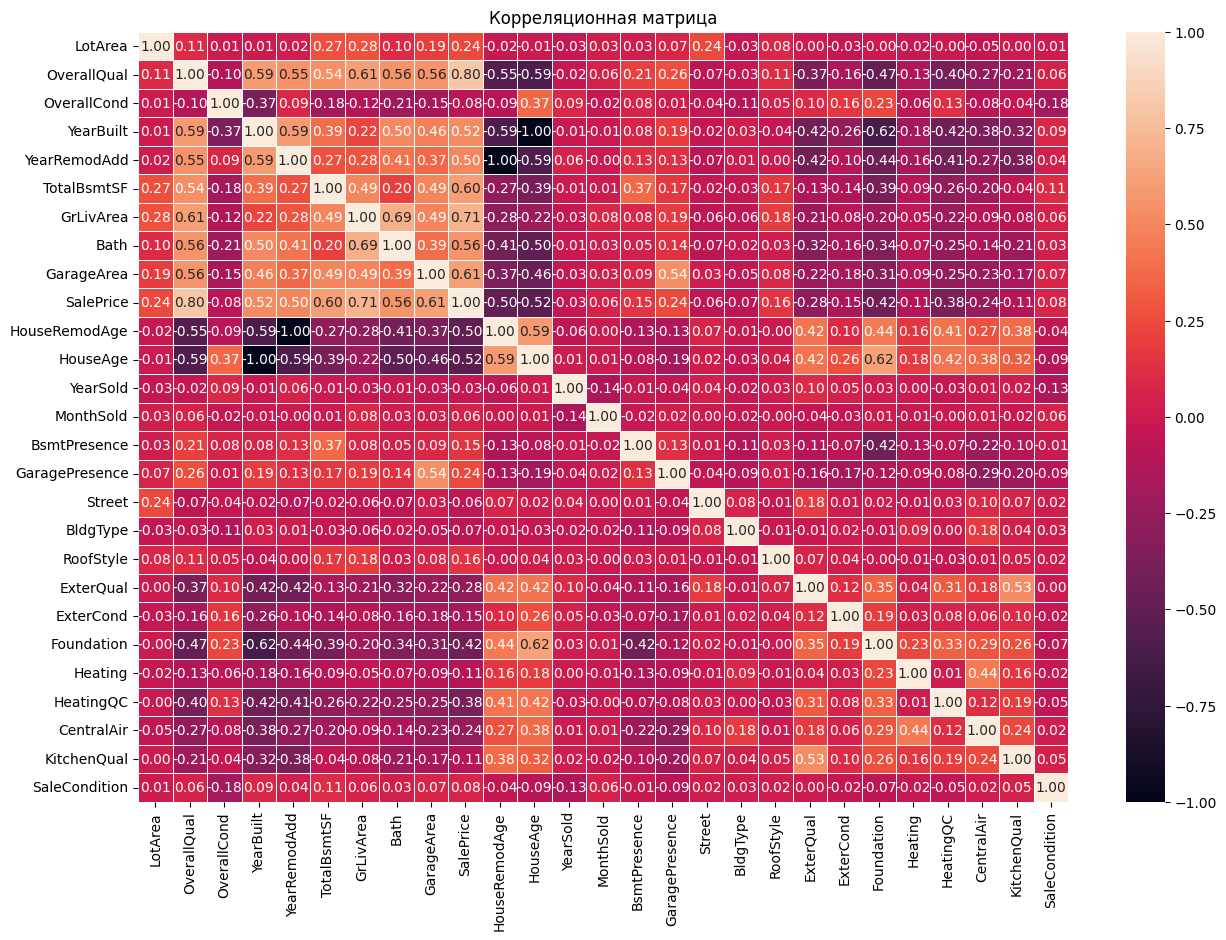

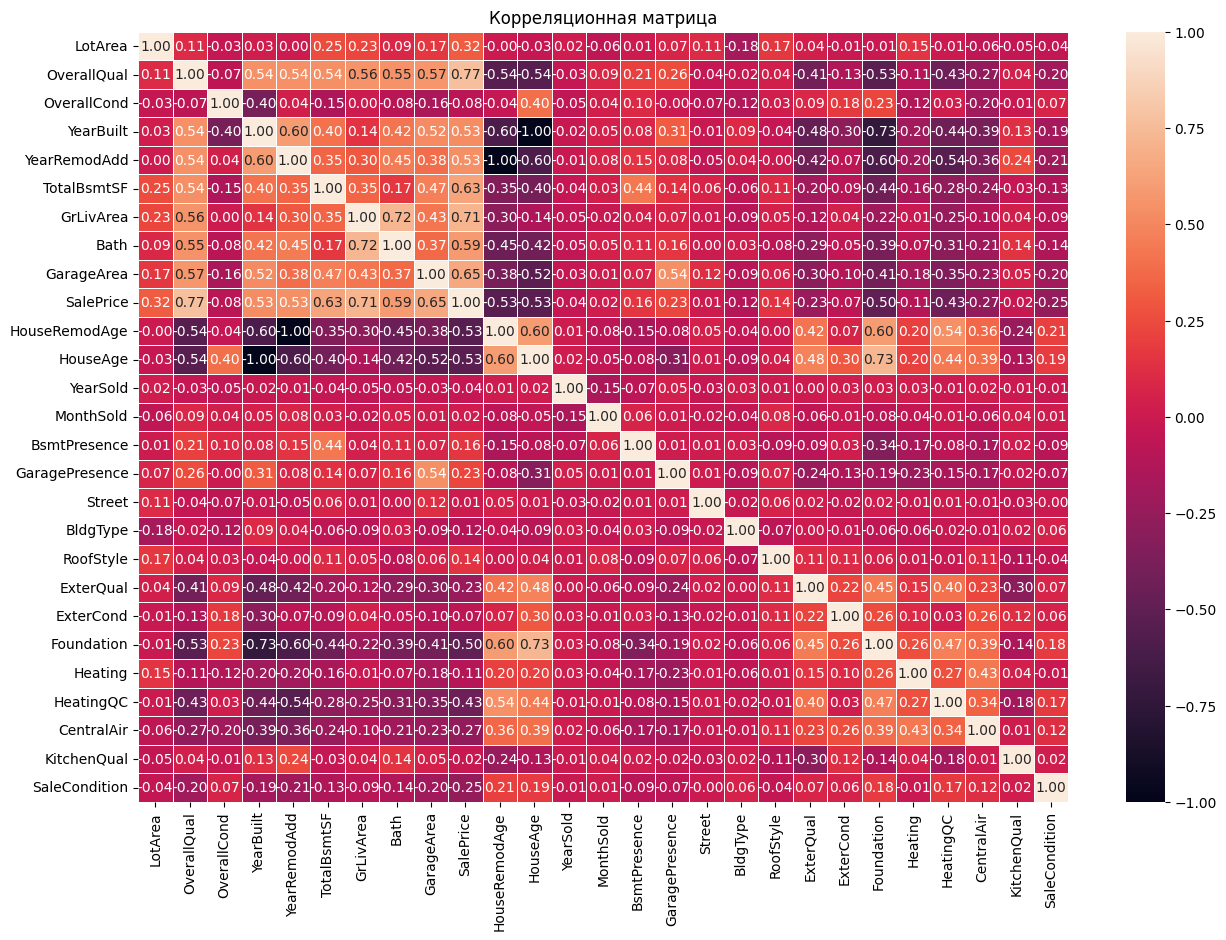

In [1981]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

correlation_matrix = test_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 